# Welcome to my Richter's Predictor Nepal Earthquake Damage Predictor XGBoost Model!

Default code from Kaggle Notebook:

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



## Displaying some important libraries:

In [16]:
# import tensorflow as tf
# print("Tensorflow:", tf.__version__)

# import kerastuner as kt
# print("kerastuner:", kt.__version__)

# import keras_tuner as kt2
# print("keras_tuner:", kt2.__version__)

# import platform
# print("Python:", platform.python_version())

# import numpy as np
# print("numpy:", np.__version__)

# import pandas as pd
# print("pandas:", pd.__version__)

# import sklearn
# print("sklearn version:", sklearn.__version__)

# import sklearn
# print("sklearn path:", sklearn.__path__)

# import matplotlib
# print("matplotlib:", matplotlib.__version__)

# import seaborn as sns
# print("seaborn:", sns.__version__)

# # WARNING:tensorflow:From c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

# # Tensorflow: 2.15.0
# # C:\Users\Micha\AppData\Local\Temp\ipykernel_6936\1753711907.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
# #   import kerastuner as kt
# # kerastuner: 1.0.5
# # keras_tuner: 1.3.5
# # Python: 3.10.11
# # numpy: 1.24.3
# # pandas: 2.1.4
# # sklearn version: 1.2.2
# # sklearn path: ['c:\\Users\\Micha\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\sklearn']
# # matplotlib: 3.8.2
# # seaborn: 0.13.0


## Set Global random seed to make sure we can replicate any model that we create (no randomness)

In [17]:
import random
import tensorflow as tf
import numpy as np
import os



np.random.seed(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

### Loading the training and testing data

train_values are the features (X), and train_labels is the target/label (Y)

In [18]:
train_X = pd.read_csv("train_values.csv")
train_Y = pd.read_csv("train_labels.csv")

test_values = pd.read_csv("test_values.csv")

# print("train labels:\n", train_Y.head())

# print("train values:\n", train_X.head())
      
# print("test_values:\n", test_values.head())

## I want to find out which features to use since there are so many. Here are some common data science techniques:

1. **Correlation Matrix with Heatmap**: Correlation states how the features are related to each other or the target variable. You can use a heatmap to visualize the correlation matrix.

2. **Univariate Selection**: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the `SelectKBest` class that can be used with a suite of different statistical tests to select a specific number of features.

3. **Recursive Feature Elimination (RFE)**: RFE is a popular feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

4. **Feature Importance**: You can get the feature importance of each feature of your dataset by using the feature importance property of the model. For example, Decision Trees models in the scikit-learn library offer an importance property that can be accessed directly.

For categorical features, you can convert them into numerical values using techniques like One-Hot Encoding or Label Encoding before applying these feature selection techniques. 

## First, I will try RFE (Recursive Feature Elimination)

In [19]:
# from sklearn.feature_selection import RFE
# from lightgbm import LGBMRegressor #Lightgbm is a great gradient boosting model for large amount of data

# # Assuming X is your feature set and y is the target value
# X = train_X.drop('building_id', axis=1)
# X = pd.get_dummies(X)

# y = train_Y.drop('building_id', axis=1)
# y = np.ravel(y) # converting dataframe to a one-dimensional array using the ravel function from numpy

# estimator = LGBMRegressor(verbose = 0, random_state = 42)  # It's best to find the best model for you
# selector = RFE(estimator, step=1)
# selector = selector.fit(X, y)

# # Assuming 'X' is your DataFrame with the feature data
# feature_names = X.columns

# # Map the feature names to the support array, which tells you which features were selected
# support_dict = dict(zip(feature_names, selector.support_))

# # Get the selected features
# selected_features = [feature for feature, support in support_dict.items() if support]

# # Print the selected features
# print("Selected features:\n", selected_features)

# # ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
# # 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
# # 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
# # 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
# # 'land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 
# # 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s',
# # 'plan_configuration_u']







# # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
# # Selected features are assigned rank 1.
# # Map the feature names to the ranking array
# ranking_dict = dict(zip(feature_names, selector.ranking_))
# print(ranking_dict)


# # [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2 18 10 31
# #  27 33 28 25 30  6  1  1  3  1  8  1  1  5  1  1  1  1 34  1  1 16  9  1
# #  23  7  4 14  1 29 15 20 17 35 32 24 21 13 26  1 11 22 12 19]


# # {'geo_level_1_id': 1, 'geo_level_2_id': 1, 'geo_level_3_id': 1, 'count_floors_pre_eq': 1, 'age': 1, 'area_percentage': 1, 
# #  'height_percentage': 1, 'has_superstructure_adobe_mud': 1, 'has_superstructure_mud_mortar_stone': 1, 'has_superstructure_stone_flag': 1, 
# #  'has_superstructure_cement_mortar_stone': 1, 'has_superstructure_mud_mortar_brick': 1, 'has_superstructure_cement_mortar_brick': 1, 
# #  'has_superstructure_timber': 1, 'has_superstructure_bamboo': 1, 'has_superstructure_rc_non_engineered': 1, 'has_superstructure_rc_engineered': 1, 
# #  'has_superstructure_other': 1, 'count_families': 1, 'has_secondary_use': 1, 'has_secondary_use_agriculture': 2, 'has_secondary_use_hotel': 18, 
# #  'has_secondary_use_rental': 10, 'has_secondary_use_institution': 31, 'has_secondary_use_school': 27, 'has_secondary_use_industry': 33, 
# #  'has_secondary_use_health_post': 28, 'has_secondary_use_gov_office': 25, 'has_secondary_use_use_police': 30, 'has_secondary_use_other': 6, 
# #  'land_surface_condition_n': 1, 'land_surface_condition_o': 1, 'land_surface_condition_t': 3, 'foundation_type_h': 1, 'foundation_type_i': 8, 
# #  'foundation_type_r': 1, 'foundation_type_u': 1, 'foundation_type_w': 5, 'roof_type_n': 1, 'roof_type_q': 1, 'roof_type_x': 1, 
# #  'ground_floor_type_f': 1, 'ground_floor_type_m': 34, 'ground_floor_type_v': 1, 'ground_floor_type_x': 1, 'ground_floor_type_z': 16, 
# #  'other_floor_type_j': 9, 'other_floor_type_q': 1, 'other_floor_type_s': 23, 'other_floor_type_x': 7, 'position_j': 4, 'position_o': 14, 
# #  'position_s': 1, 'position_t': 29, 'plan_configuration_a': 15, 'plan_configuration_c': 20, 'plan_configuration_d': 17, 'plan_configuration_f': 35, 
# #  'plan_configuration_m': 32, 'plan_configuration_n': 24, 'plan_configuration_o': 21, 'plan_configuration_q': 13, 'plan_configuration_s': 26, 
# #  'plan_configuration_u': 1, 'legal_ownership_status_a': 11, 'legal_ownership_status_r': 22, 'legal_ownership_status_v': 12, 
# #  'legal_ownership_status_w': 19}

In [20]:
features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
'land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 
'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s',
'plan_configuration_u']

print(len(features))


# Find out which features are created through one-hot-encoding
import pandas as pd

# Load the original data
original_data = pd.read_csv('train_values.csv')

# Get the original feature names
original_features = original_data.columns

# Check which features are not in the original data
new_features = [feature for feature in features if feature not in original_features]

# Print the new features
print("New features:\n", new_features)


#Manually remove the one-hot-encoding that pd.get_dummies() used on categorial 
features_before_dummies = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type','other_floor_type', 'position','plan_configuration']

print(len(features_before_dummies))

34
New features:
 ['land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s', 'plan_configuration_u']
27


## Data Analysis from ChatGPT-4 (second way to find best features):

The categorical variables in the features dataset have been successfully encoded. Now, let's look at the correlation of these features with the `damage_grade`:

#### Correlation with `damage_grade`
The correlation values range between -1 and 1. A value closer to 1 indicates a strong positive correlation, meaning that as the feature increases, the `damage_grade` tends to increase. Conversely, a value closer to -1 indicates a strong negative correlation, where an increase in the feature leads to a decrease in `damage_grade`. Values around 0 imply weak or no linear correlation.

#### Top Positively Correlated Features:
- `has_superstructure_mud_mortar_stone`
- `count_floors_pre_eq`
- Other features like `legal_ownership_status`, `has_superstructure_stone_flag`, etc., also show positive correlation but to a lesser extent.

#### Top Negatively Correlated Features:
- `has_superstructure_cement_mortar_brick`
- `ground_floor_type`
- `has_superstructure_rc_engineered`
- Other features like `roof_type`, `has_superstructure_rc_non_engineered`, etc., also show negative correlation.


Here are the selected features based on the correlation threshold (of 0.05):

1. `has_superstructure_mud_mortar_stone`
2. `count_floors_pre_eq`
3. `legal_ownership_status`
4. `has_superstructure_stone_flag`
5. `count_families`
6. `has_superstructure_adobe_mud`
7. `position`
8. `has_superstructure_cement_mortar_stone`
9. `has_superstructure_bamboo`
10. `has_superstructure_timber`
11. `geo_level_1_id`
12. `has_secondary_use`
13. `has_secondary_use_rental`
14. `has_secondary_use_hotel`
15. `foundation_type`
16. `area_percentage`
17. `has_superstructure_rc_non_engineered`
18. `roof_type`
19. `has_superstructure_rc_engineered`
20. `ground_floor_type`
21. `has_superstructure_cement_mortar_brick`

These features were chosen because they have a correlation with the target variable `damage_grade` greater than the specified threshold of 0.05 (in absolute value). You can use these features for building your predictive model. 


In [21]:
features2 = [
    "has_superstructure_mud_mortar_stone",
    "count_floors_pre_eq",
    "legal_ownership_status",
    "has_superstructure_stone_flag",
    "count_families",
    "has_superstructure_adobe_mud",
    "position",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_bamboo",
    "has_superstructure_timber",
    "geo_level_1_id",
    "has_secondary_use",
    "has_secondary_use_rental",
    "has_secondary_use_hotel",
    "foundation_type",
    "area_percentage",
    "has_superstructure_rc_non_engineered",
    "roof_type",
    "has_superstructure_rc_engineered",
    "ground_floor_type",
    "has_superstructure_cement_mortar_brick"
]

### Third, I will try SelectKBest to find best features

In [22]:
# from sklearn.feature_selection import SelectKBest, f_classif


# # Create the SelectKBest with the f_classif function. You can set the parameter "k" equal to a number if you want to limit the amount of features
# selector = SelectKBest(f_classif, k = 20) # Getting the 20 best features

# # Assuming X is your feature set and y is the target value
# X = train_X.drop('building_id', axis=1)
# X = pd.get_dummies(X)

# y = train_Y.drop('building_id', axis=1)
# y = np.ravel(y) # converting dataframe to a one-dimensional array using the ravel function from numpy


# # Fit the selector to the data
# selector.fit(X, y)

# # Get the boolean mask of the selected features
# mask = selector.get_support()

# # Get the names of the selected features
# selected_features = X.columns[mask]

# # Convert the Index object to a list
# features3 = selected_features.tolist()

# print(features3)

# # ['geo_level_1_id', 'count_floors_pre_eq', 'area_percentage', 'has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 
# #  'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
# #  'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_x', 'ground_floor_type_f', 
# #  'ground_floor_type_v', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s']


# # Get the scores
# scores = selector.scores_

# # Create a DataFrame with the scores
# features_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# # Sort the DataFrame by score in descending order
# features_scores = features_scores.sort_values(by='Score', ascending=False)

# # print the best 20 features
# print(features_scores[0:19])

# #                                    Feature         Score
# # 35                       foundation_type_r  23787.275036
# # 43                     ground_floor_type_v  20782.933584
# # 40                             roof_type_x  16891.038184
# # 8      has_superstructure_mud_mortar_stone  16490.386507
# # 34                       foundation_type_i  16385.772905
# # 12  has_superstructure_cement_mortar_brick  11120.193268
# # 48                      other_floor_type_s  10507.484572
# # 41                     ground_floor_type_f  10151.525359
# # 16        has_superstructure_rc_engineered   7757.593854
# # 47                      other_floor_type_q   7378.599061
# # 15    has_superstructure_rc_non_engineered   4721.916051
# # 37                       foundation_type_w   4568.674306
# # 46                      other_floor_type_j   4533.708398
# # 36                       foundation_type_u   2972.409108
# # 0                           geo_level_1_id   2657.791274
# # 3                      count_floors_pre_eq   2544.836052
# # 5                          area_percentage   2529.046730
# # 38                             roof_type_n   1776.396178
# # 21                 has_secondary_use_hotel   1537.672773

# # ...

# # 22                has_secondary_use_rental   1342.099336
# # 64                legal_ownership_status_a   1166.606551
# # 19                       has_secondary_use    841.802928
# # 39                             roof_type_q    761.885856
# # 7             has_superstructure_adobe_mud    739.412821
# # 13               has_superstructure_timber    659.199014
# # 9            has_superstructure_stone_flag    576.438023
# # 14               has_superstructure_bamboo    538.551492
# # 66                legal_ownership_status_v    536.308634
# # 11     has_superstructure_mud_mortar_brick    531.784659
# # 63                    plan_configuration_u    515.087147
# # 10  has_superstructure_cement_mortar_stone    478.844199
# # 18                          count_families    476.562914
# # 56                    plan_configuration_d    378.234531
# # 53                              position_t    373.594539
# # 6                        height_percentage    370.173817
# # 20           has_secondary_use_agriculture    289.462856
# # 1                           geo_level_2_id    264.447807
# # 49                      other_floor_type_x    244.432657
# # 4                                      age    219.626253
# # 33                       foundation_type_h    209.425818
# # 32                land_surface_condition_t    201.698101
# # 30                land_surface_condition_n    182.152148
# # 61                    plan_configuration_q    165.370472
# # 23           has_secondary_use_institution    146.731486
# # 17                has_superstructure_other    142.014204
# # 50                              position_j    136.783490
# # 67                legal_ownership_status_w    116.039402
# # 52                              position_s    110.038831
# # 55                    plan_configuration_c     75.423022
# # 51                              position_o     75.104323


In [23]:
features3 = ['geo_level_1_id', 'count_floors_pre_eq', 'area_percentage', 'has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 
 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
 'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_x', 'ground_floor_type_f', 
 'ground_floor_type_v', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s']

### Check to see if there are any missing values in the data. If so, we have to do imputation

In [24]:
missing_train_X = train_X.isnull().sum().sum()
print("Number of missing values in train_X:", missing_train_X)

missing_train_Y = train_Y.isnull().sum().sum()
print("Number of missing values in train_Y:", missing_train_Y)

missing_test_values = test_values.isnull().sum().sum()
print("Number of missing values in test_values:", missing_test_values )

Number of missing values in train_X: 0
Number of missing values in train_Y: 0
Number of missing values in test_values: 0


Since we have 0 missing values in each dataframe, we don't have to do imputation!

### Now, we have 3 different list of features (features, features2, and features3), which I found using RFE. Data Analysis ChatGPT-4, and SelectKBest respectively

#### Now, I have to turn one-hot-encode the data using pd.get_dummies, and I'll be creating 3 seperate train_X, one for each list of possible best features. And also on the test_data

In [25]:
# 1. testX1 for the RFE features
# Since the features from RFE are the one-hot-encoded features, we have to apply features after doing pd.get_dummies()

trainX1 = pd.get_dummies(train_X)
trainX1 = trainX1[features]


# 2. testX2 for the Data Analysis ChatGPT-4
# Since the features from Data Analysis are from the original feature set, we have to apply the features before doing pd.get_dummies()

trainX2 = train_X[features2]
trainX2 = pd.get_dummies(trainX2)



# 3. testX3 for the SelectKBest
# Since the features from RFE are the one-hot-encoded features, we have to apply features after doing pd.get_dummies()

trainX3 = pd.get_dummies(train_X)
trainX3 = trainX3[features3]



# 4. Do pd.get_dummies() on test data. I will create a seperate test_data for each feature selection, since each test_data needs to have a certain set of features

test_data1 = pd.get_dummies(test_values)
test_data1 = test_data1[features + ['building_id'] ]

test_data2 = test_values[features2 + ['building_id'] ]
test_data2 = pd.get_dummies(test_data2)

test_data3 = pd.get_dummies(test_values)
test_data3 = test_data3[features3 + ['building_id'] ]



### It's important to do pd.get_dummies() before doing the train_valid_test split. Now we can do the split
I have to do train_valid_test split three times, one for each different train_X

In [26]:
from sklearn.model_selection import train_test_split

# 1. train_valid_test split for train_X1
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(trainX1, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X1, test_X1, valid_Y1, test_Y1 = train_test_split(test_X1, test_Y1, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)


# 2. train_valid_test split for train_X2
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(trainX2, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X2, test_X2, valid_Y2, test_Y2 = train_test_split(test_X2, test_Y2, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)


# 3. train_valid_test split for train_X3
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(trainX3, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X3, test_X3, valid_Y3, test_Y3 = train_test_split(test_X3, test_Y3, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)

### Now, we can normalize the data

**Creating the Normalizing Scaler**

There are many different Normalization Scalers:

1. **MinMaxScaler**: This scaler scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.


2. **StandardScaler**: This scaler standardizes features by removing the mean and scaling to unit variance.


3. **RobustScaler**: This scaler scales features using statistics that are robust to outliers. It uses the Interquartile Range (IQR) to scale the data, making it a better choice for when the data has outliers.


4. **Normalizer**: This scaler scales individual samples to have unit norm. This scaler works on the rows, not the columns!


5. **MaxAbsScaler**: This scaler scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.


Remember, the choice of scaler can depend on your specific dataset and the machine learning algorithm that you're using.

In [27]:
# I've actually decided to not do normalization since almost all the columns are categorial columns, and the non-categorial columns are mostly normalized already in the dataset, so there's no need

I've actually decided to not do normalization since almost all the columns are categorial columns, and the non-categorial columns are mostly normalized already in the dataset, so there's no need

### Creating Model 1 for XGBoost (XGBClassifier)

In [28]:
# import optuna
# import xgboost as xgb
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# # LGBMClassifier expects the labels data to only include one column. Currently, they include two columns: building_id and damage_grade.
# # So, I am making it so the labels data only includes one column (damage_grade) and changing the range from 1-3 to 0-2 since LGBMClassifier wants to start at 0
# train_Y1_temp = train_Y1['damage_grade'] - 1  
# valid_Y1_temp = valid_Y1['damage_grade'] - 1
# test_Y1_temp = test_Y1['damage_grade'] - 1

# # Concatenate training and validation and testt sets so that I have more data to fit the model on during GridSearchCV
# train_X1_full = pd.concat([train_X1, valid_X1, test_X1])
# train_Y1_temp_full = pd.concat([train_Y1_temp, valid_Y1_temp, test_Y1_temp])

# def objective(trial):
#     params = {
#         'objective': 'multi:softmax',  # Default is 'binary:logistic'
#         'num_class': 3, # Default is 1 (for binary classification)
#         'random_state': 42,  # Default is 0
#         'n_estimators': trial.suggest_int('n_estimators', 100, 600), # Default is 100
#         'max_depth': trial.suggest_int('max_depth', 3, 9), # Default is 6
#         'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.4, log=True), # Default is 0.3
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0), # Default is 1
#         #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0), # Default is 1
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1, log=True), # Default is 0
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 2, log=True),  # Default is 1
#     }

#     model = xgb.XGBClassifier(**params)
#     cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     score = cross_val_score(model, train_X1_full, train_Y1_temp_full, cv=cv, scoring='f1_micro', n_jobs=-1)
#     f1 = score.mean()
#     return f1       


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100) 

# print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

# # TOOK 1 HOUR AND 19 MIN UTES for 100 trials

 
# # [I 2024-01-09 23:00:04,003] A new study created in memory with name: no-name-a891ab1f-114d-434b-ab03-d678fabd3a31
# # [I 2024-01-09 23:00:23,211] Trial 0 finished with value: 0.7333087747169044 and parameters: {'n_estimators': 201, 'max_depth': 6, 'learning_rate': 0.26052530569784765, 'subsample': 0.6006924099965518, 'reg_alpha': 0.047018934020999624, 'reg_lambda': 0.00011206777119288735}. Best is trial 0 with value: 0.7333087747169044.
# # [I 2024-01-09 23:01:23,154] Trial 1 finished with value: 0.7433893193042237 and parameters: {'n_estimators': 587, 'max_depth': 9, 'learning_rate': 0.05088597132699915, 'subsample': 0.825629146173626, 'reg_alpha': 0.0001624842611518334, 'reg_lambda': 0.00012216763298662962}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:02:05,943] Trial 2 finished with value: 0.6849474867709641 and parameters: {'n_estimators': 548, 'max_depth': 6, 'learning_rate': 0.00568024000478306, 'subsample': 0.9552159429195286, 'reg_alpha': 5.852210207826423e-05, 'reg_lambda': 2.9666804841945843e-07}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:02:21,335] Trial 3 finished with value: 0.7088729513701022 and parameters: {'n_estimators': 128, 'max_depth': 9, 'learning_rate': 0.02185191921445119, 'subsample': 0.6258068912866841, 'reg_alpha': 7.508649731919097e-05, 'reg_lambda': 2.3617664090517076e-08}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:02:50,350] Trial 4 finished with value: 0.665223847951466 and parameters: {'n_estimators': 464, 'max_depth': 4, 'learning_rate': 0.008933709620324984, 'subsample': 0.574449511319924, 'reg_alpha': 2.6676689420461742e-05, 'reg_lambda': 0.034642180904670285}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:03:32,480] Trial 5 finished with value: 0.7271038867847782 and parameters: {'n_estimators': 536, 'max_depth': 7, 'learning_rate': 0.0358782365857866, 'subsample': 0.8987753714956488, 'reg_alpha': 0.0011327153885398499, 'reg_lambda': 0.002833101403488936}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:04:21,129] Trial 6 finished with value: 0.7348743865142496 and parameters: {'n_estimators': 530, 'max_depth': 8, 'learning_rate': 0.03697513393365109, 'subsample': 0.5326774394094727, 'reg_alpha': 0.2536833382225363, 'reg_lambda': 0.007174370653213359}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:04:55,802] Trial 7 finished with value: 0.7212098188418309 and parameters: {'n_estimators': 473, 'max_depth': 3, 'learning_rate': 0.3469992550543149, 'subsample': 0.8617850018879492, 'reg_alpha': 0.048276210815380846, 'reg_lambda': 8.652316990769502e-07}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:05:56,665] Trial 8 finished with value: 0.7371652449530125 and parameters: {'n_estimators': 599, 'max_depth': 8, 'learning_rate': 0.04187654421981936, 'subsample': 0.9293555344679156, 'reg_alpha': 0.00026786992318198594, 'reg_lambda': 5.555298132151663e-07}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:06:05,598] Trial 9 finished with value: 0.6717050203184178 and parameters: {'n_estimators': 130, 'max_depth': 4, 'learning_rate': 0.03851392145346366, 'subsample': 0.661516945502004, 'reg_alpha': 1.1535276258537843e-05, 'reg_lambda': 1.2161616462579603e-08}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:06:38,009] Trial 10 finished with value: 0.7424645339043211 and parameters: {'n_estimators': 310, 'max_depth': 9, 'learning_rate': 0.14811976819529804, 'subsample': 0.7841115081870227, 'reg_alpha': 0.007443192801145212, 'reg_lambda': 0.5859348365040832}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:07:08,070] Trial 11 finished with value: 0.7420577818197168 and parameters: {'n_estimators': 296, 'max_depth': 9, 'learning_rate': 0.1390812875415526, 'subsample': 0.7799348240450799, 'reg_alpha': 0.004780691848633306, 'reg_lambda': 8.932795755015078e-05}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:07:45,831] Trial 12 finished with value: 0.7432473398029938 and parameters: {'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.11103122570915094, 'subsample': 0.7713817633755247, 'reg_alpha': 0.0036752931163281386, 'reg_lambda': 1.3294949493234096}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:08:17,635] Trial 13 finished with value: 0.7386310873711152 and parameters: {'n_estimators': 405, 'max_depth': 7, 'learning_rate': 0.10070349623974262, 'subsample': 0.7095570773083473, 'reg_alpha': 0.0006445168786881791, 'reg_lambda': 1.0565307773087633}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:08:53,731] Trial 14 finished with value: 0.7397016895560645 and parameters: {'n_estimators': 374, 'max_depth': 8, 'learning_rate': 0.0798088261236293, 'subsample': 0.8357763518168788, 'reg_alpha': 0.0002297842902392959, 'reg_lambda': 1.2590981968717636e-05}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:09:20,381] Trial 15 finished with value: 0.6950280313582834 and parameters: {'n_estimators': 233, 'max_depth': 7, 'learning_rate': 0.016301949210064583, 'subsample': 0.7087931112513088, 'reg_alpha': 0.0017611211516015107, 'reg_lambda': 0.0004892742600721694}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:10:08,904] Trial 16 finished with value: 0.7400125095452434 and parameters: {'n_estimators': 416, 'max_depth': 9, 'learning_rate': 0.0666521833144291, 'subsample': 0.9912573498998496, 'reg_alpha': 0.0165424701514291, 'reg_lambda': 0.07766136691476097}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:10:31,690] Trial 17 finished with value: 0.7305267439495627 and parameters: {'n_estimators': 315, 'max_depth': 5, 'learning_rate': 0.19424057873297448, 'subsample': 0.824582956742095, 'reg_alpha': 0.5390343720614504, 'reg_lambda': 7.519193033673916e-06}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:10:55,878] Trial 18 finished with value: 0.706509184538816 and parameters: {'n_estimators': 237, 'max_depth': 8, 'learning_rate': 0.01949497912789025, 'subsample': 0.7364023186915425, 'reg_alpha': 0.00019867289450538922, 'reg_lambda': 0.0010804856515630277}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:11:35,598] Trial 19 finished with value: 0.7346364749175943 and parameters: {'n_estimators': 477, 'max_depth': 7, 'learning_rate': 0.06127625124909843, 'subsample': 0.8721212504567811, 'reg_alpha': 0.01938063059842054, 'reg_lambda': 0.06414636147505137}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:12:30,349] Trial 20 finished with value: 0.737249665196987 and parameters: {'n_estimators': 599, 'max_depth': 6, 'learning_rate': 0.09372506571705211, 'subsample': 0.7921978170796418, 'reg_alpha': 0.0007908211835571311, 'reg_lambda': 1.348877806224597e-05}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:13:12,818] Trial 21 finished with value: 0.7425374422968446 and parameters: {'n_estimators': 307, 'max_depth': 9, 'learning_rate': 0.1590477617645034, 'subsample': 0.7734088339361191, 'reg_alpha': 0.004923345803188596, 'reg_lambda': 1.3369419909428928}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:14:01,814] Trial 22 finished with value: 0.7419656870081082 and parameters: {'n_estimators': 351, 'max_depth': 9, 'learning_rate': 0.1348056969749821, 'subsample': 0.6825745186623345, 'reg_alpha': 0.00262258576503164, 'reg_lambda': 0.3268314611603986}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:14:34,422] Trial 23 finished with value: 0.7403847260754947 and parameters: {'n_estimators': 267, 'max_depth': 8, 'learning_rate': 0.2287101016144441, 'subsample': 0.7538138607930241, 'reg_alpha': 0.009065003861654423, 'reg_lambda': 0.0066450449288388315}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:14:57,058] Trial 24 finished with value: 0.7380401456632937 and parameters: {'n_estimators': 179, 'max_depth': 9, 'learning_rate': 0.3871996524015227, 'subsample': 0.8217875302070918, 'reg_alpha': 0.07630656352548418, 'reg_lambda': 1.7195195597531376}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:15:38,757] Trial 25 finished with value: 0.7384622468831662 and parameters: {'n_estimators': 438, 'max_depth': 8, 'learning_rate': 0.05788180406232143, 'subsample': 0.7412841405888144, 'reg_alpha': 0.0026212143977133126, 'reg_lambda': 0.2195034468509065}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:16:17,619] Trial 26 finished with value: 0.7432473398029938 and parameters: {'n_estimators': 361, 'max_depth': 9, 'learning_rate': 0.11393214683023366, 'subsample': 0.8977289922814432, 'reg_alpha': 0.0003914864386644773, 'reg_lambda': 0.023545224427202638}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:16:57,774] Trial 27 finished with value: 0.7213978457488652 and parameters: {'n_estimators': 371, 'max_depth': 8, 'learning_rate': 0.02828400992256516, 'subsample': 0.8906334951986903, 'reg_alpha': 0.0003683686610476211, 'reg_lambda': 0.03146687663425673}. Best is trial 1 with value: 0.7433893193042237.
# # [I 2024-01-09 23:17:51,875] Trial 28 finished with value: 0.7435121123863685 and parameters: {'n_estimators': 503, 'max_depth': 9, 'learning_rate': 0.1003129145568426, 'subsample': 0.9339489199783957, 'reg_alpha': 7.287435099971498e-05, 'reg_lambda': 0.00041200226288994816}. Best is trial 28 with value: 0.7435121123863685.
# # [I 2024-01-09 23:18:29,611] Trial 29 finished with value: 0.7317508374871929 and parameters: {'n_estimators': 506, 'max_depth': 7, 'learning_rate': 0.050338048721845545, 'subsample': 0.9432681487969389, 'reg_alpha': 7.127623102303377e-05, 'reg_lambda': 0.0001034665970015755}. Best is trial 28 with value: 0.7435121123863685.
# # [I 2024-01-09 23:19:03,499] Trial 30 finished with value: 0.7241261545427684 and parameters: {'n_estimators': 571, 'max_depth': 5, 'learning_rate': 0.07733038900979214, 'subsample': 0.9735927926646701, 'reg_alpha': 0.00011538426905578963, 'reg_lambda': 0.0003822771768784155}. Best is trial 28 with value: 0.7435121123863685.
# # [I 2024-01-09 23:19:54,372] Trial 31 finished with value: 0.7433317600469683 and parameters: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.10870133168211372, 'subsample': 0.9135616265836577, 'reg_alpha': 3.193653432961089e-05, 'reg_lambda': 0.009990700261163816}. Best is trial 28 with value: 0.7435121123863685.
# # [I 2024-01-09 23:20:44,610] Trial 32 finished with value: 0.7337001776662406 and parameters: {'n_estimators': 502, 'max_depth': 9, 'learning_rate': 0.25603841289662976, 'subsample': 0.9329598365452315, 'reg_alpha': 1.97340256750812e-05, 'reg_lambda': 5.8909452465288355e-05}. Best is trial 28 with value: 0.7435121123863685.
# # [I 2024-01-09 23:21:33,026] Trial 33 finished with value: 0.743596532630343 and parameters: {'n_estimators': 567, 'max_depth': 8, 'learning_rate': 0.10083473171825715, 'subsample': 0.8492514815691262, 'reg_alpha': 3.448161073426747e-05, 'reg_lambda': 0.0020333024383809638}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:22:20,074] Trial 34 finished with value: 0.7431705941266534 and parameters: {'n_estimators': 560, 'max_depth': 8, 'learning_rate': 0.0841190179415389, 'subsample': 0.8608842459623286, 'reg_alpha': 3.184922332039331e-05, 'reg_lambda': 0.001871118149324902}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:23:18,493] Trial 35 finished with value: 0.7182244120321871 and parameters: {'n_estimators': 514, 'max_depth': 9, 'learning_rate': 0.012084280692885403, 'subsample': 0.9162543974622568, 'reg_alpha': 4.0964505342414395e-05, 'reg_lambda': 0.0002892193920427215}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:24:04,635] Trial 36 finished with value: 0.7419196396023038 and parameters: {'n_estimators': 565, 'max_depth': 8, 'learning_rate': 0.18614422825244853, 'subsample': 0.9647438475273754, 'reg_alpha': 0.00010995321435041975, 'reg_lambda': 0.0038511384396849573}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:25:02,037] Trial 37 finished with value: 0.737614207159604 and parameters: {'n_estimators': 534, 'max_depth': 9, 'learning_rate': 0.031017551244565893, 'subsample': 0.8438282730494945, 'reg_alpha': 1.4815589331323914e-05, 'reg_lambda': 0.013134059299983897}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:25:44,001] Trial 38 finished with value: 0.7302312730956521 and parameters: {'n_estimators': 448, 'max_depth': 7, 'learning_rate': 0.04962027500979714, 'subsample': 0.8085701408612248, 'reg_alpha': 4.1207737712837114e-05, 'reg_lambda': 4.291593392303632e-05}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:26:41,413] Trial 39 finished with value: 0.6989650845545489 and parameters: {'n_estimators': 489, 'max_depth': 8, 'learning_rate': 0.0056866145963278495, 'subsample': 0.9114682517870011, 'reg_alpha': 9.754101315811237e-05, 'reg_lambda': 3.851186002494117e-06}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:27:20,477] Trial 40 finished with value: 0.7230747387769041 and parameters: {'n_estimators': 577, 'max_depth': 5, 'learning_rate': 0.06504942570478692, 'subsample': 0.8757527008129107, 'reg_alpha': 1.970956391580199e-05, 'reg_lambda': 0.0011527581531044133}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:28:14,428] Trial 41 finished with value: 0.7418889413317676 and parameters: {'n_estimators': 542, 'max_depth': 9, 'learning_rate': 0.12254169079091909, 'subsample': 0.8480233361068809, 'reg_alpha': 5.97072552116587e-05, 'reg_lambda': 0.0007933604590777581}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:29:05,621] Trial 42 finished with value: 0.7407722917410141 and parameters: {'n_estimators': 521, 'max_depth': 9, 'learning_rate': 0.10590177308091096, 'subsample': 0.6033194813894606, 'reg_alpha': 0.00014666679678133088, 'reg_lambda': 0.00020188382092366081}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:29:50,360] Trial 43 finished with value: 0.7395520354872008 and parameters: {'n_estimators': 457, 'max_depth': 9, 'learning_rate': 0.16521147875940098, 'subsample': 0.8073137018848776, 'reg_alpha': 3.266218759081499e-05, 'reg_lambda': 2.914488415395374e-05}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:30:44,468] Trial 44 finished with value: 0.732913534483751 and parameters: {'n_estimators': 596, 'max_depth': 8, 'learning_rate': 0.29313952164694373, 'subsample': 0.8856400066573981, 'reg_alpha': 0.0012207564827678593, 'reg_lambda': 0.0029087659458297043}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:31:24,942] Trial 45 finished with value: 0.7404039124945799 and parameters: {'n_estimators': 395, 'max_depth': 9, 'learning_rate': 0.09025598705777844, 'subsample': 0.9967213035967059, 'reg_alpha': 0.00048000211817505746, 'reg_lambda': 0.11875813918986418}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:32:21,437] Trial 46 finished with value: 0.7430900111664959 and parameters: {'n_estimators': 549, 'max_depth': 8, 'learning_rate': 0.11754895571158072, 'subsample': 0.9568219767374775, 'reg_alpha': 1.1653841302639015e-05, 'reg_lambda': 1.307606827833739e-07}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:32:53,101] Trial 47 finished with value: 0.6967701582112117 and parameters: {'n_estimators': 436, 'max_depth': 3, 'learning_rate': 0.07432138782314236, 'subsample': 0.5332199401419515, 'reg_alpha': 0.00021724835795370763, 'reg_lambda': 0.014355190203258305}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:33:58,102] Trial 48 finished with value: 0.7416203314645761 and parameters: {'n_estimators': 491, 'max_depth': 9, 'learning_rate': 0.05307120185180966, 'subsample': 0.91583246576904, 'reg_alpha': 6.23152792835018e-05, 'reg_lambda': 0.0001457526557634007}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:34:44,897] Trial 49 finished with value: 0.734751593432105 and parameters: {'n_estimators': 332, 'max_depth': 9, 'learning_rate': 0.04196697495917679, 'subsample': 0.7629476092339872, 'reg_alpha': 2.007818681290058e-05, 'reg_lambda': 1.345536595179626e-06}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:35:20,933] Trial 50 finished with value: 0.7290570642476429 and parameters: {'n_estimators': 582, 'max_depth': 4, 'learning_rate': 0.20628829058889683, 'subsample': 0.7245710906348227, 'reg_alpha': 0.0012655603915784149, 'reg_lambda': 0.0069572243422086465}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:35:55,820] Trial 51 finished with value: 0.7431859432619214 and parameters: {'n_estimators': 373, 'max_depth': 9, 'learning_rate': 0.10800753203020971, 'subsample': 0.8971631099202375, 'reg_alpha': 0.00031298091579787626, 'reg_lambda': 0.01710564012385445}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:36:48,408] Trial 52 finished with value: 0.7402964685477033 and parameters: {'n_estimators': 424, 'max_depth': 9, 'learning_rate': 0.16403737072975874, 'subsample': 0.8519889863042217, 'reg_alpha': 4.7029714059451447e-05, 'reg_lambda': 0.548907597406904}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:36:59,093] Trial 53 finished with value: 0.7255919969608713 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.11982236385626727, 'subsample': 0.7980966716500798, 'reg_alpha': 0.0007329406105614228, 'reg_lambda': 0.03316164511940057}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:37:50,381] Trial 54 finished with value: 0.7433355973307855 and parameters: {'n_estimators': 471, 'max_depth': 9, 'learning_rate': 0.10077944010061841, 'subsample': 0.8297793958661175, 'reg_alpha': 0.00013738010915348818, 'reg_lambda': 0.0018687479882408867}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:38:37,950] Trial 55 finished with value: 0.7408298509982694 and parameters: {'n_estimators': 472, 'max_depth': 9, 'learning_rate': 0.1361330367507099, 'subsample': 0.8223250531384398, 'reg_alpha': 0.00015616769096915852, 'reg_lambda': 0.0008413997364397366}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:39:24,295] Trial 56 finished with value: 0.7418390566421463 and parameters: {'n_estimators': 529, 'max_depth': 8, 'learning_rate': 0.06944214921643611, 'subsample': 0.8309731908600331, 'reg_alpha': 8.320134354863929e-05, 'reg_lambda': 0.003625297658491838}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:40:24,980] Trial 57 finished with value: 0.743581183495075 and parameters: {'n_estimators': 555, 'max_depth': 9, 'learning_rate': 0.09228860449226807, 'subsample': 0.8681536868529991, 'reg_alpha': 1.0609012337344487e-05, 'reg_lambda': 0.0005011656697109183}. Best is trial 33 with value: 0.743596532630343.
# # [I 2024-01-09 23:41:19,458] Trial 58 finished with value: 0.7437500239830239 and parameters: {'n_estimators': 553, 'max_depth': 9, 'learning_rate': 0.084354574047343, 'subsample': 0.877643098301532, 'reg_alpha': 1.0942230630211092e-05, 'reg_lambda': 0.0004413581362295261}. Best is trial 58 with value: 0.7437500239830239.
# # [I 2024-01-09 23:42:06,763] Trial 59 finished with value: 0.7345367055383517 and parameters: {'n_estimators': 556, 'max_depth': 8, 'learning_rate': 0.03520471456963472, 'subsample': 0.8605611495151771, 'reg_alpha': 1.2885186398359719e-05, 'reg_lambda': 0.00045935298754463965}. Best is trial 58 with value: 0.7437500239830239.
# # [I 2024-01-09 23:42:44,232] Trial 60 finished with value: 0.7301468528516776 and parameters: {'n_estimators': 586, 'max_depth': 6, 'learning_rate': 0.05884096670615191, 'subsample': 0.8788621713068385, 'reg_alpha': 2.5514573880617388e-05, 'reg_lambda': 0.0016902265219972056}. Best is trial 58 with value: 0.7437500239830239.
# # [I 2024-01-09 23:43:36,016] Trial 61 finished with value: 0.7435888580627088 and parameters: {'n_estimators': 540, 'max_depth': 9, 'learning_rate': 0.09355116358944579, 'subsample': 0.9336940442739986, 'reg_alpha': 2.529754800812459e-05, 'reg_lambda': 0.00019765414364051362}. Best is trial 58 with value: 0.7437500239830239.
# # [I 2024-01-09 23:44:28,643] Trial 62 finished with value: 0.7440032847149474 and parameters: {'n_estimators': 543, 'max_depth': 9, 'learning_rate': 0.09107783861185915, 'subsample': 0.9231950980125518, 'reg_alpha': 1.0170523313529933e-05, 'reg_lambda': 0.00023219813720820273}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:45:36,823] Trial 63 finished with value: 0.7433087363440661 and parameters: {'n_estimators': 545, 'max_depth': 9, 'learning_rate': 0.08923095090933364, 'subsample': 0.9354805327704463, 'reg_alpha': 1.6628730536526093e-05, 'reg_lambda': 1.9027490261511004e-05}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:46:49,289] Trial 64 finished with value: 0.7438536306460835 and parameters: {'n_estimators': 521, 'max_depth': 9, 'learning_rate': 0.07723958420863987, 'subsample': 0.9463964251845542, 'reg_alpha': 1.0045866757270406e-05, 'reg_lambda': 9.004111899573125e-05}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:47:45,564] Trial 65 finished with value: 0.743615719049428 and parameters: {'n_estimators': 526, 'max_depth': 9, 'learning_rate': 0.08315698901079004, 'subsample': 0.9444086555171886, 'reg_alpha': 1.0266861608544172e-05, 'reg_lambda': 7.800911085423565e-05}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:48:28,991] Trial 66 finished with value: 0.7374492039554722 and parameters: {'n_estimators': 529, 'max_depth': 7, 'learning_rate': 0.08122316152256841, 'subsample': 0.9801210863846315, 'reg_alpha': 1.0302140277183824e-05, 'reg_lambda': 6.372226978662515e-05}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:49:26,570] Trial 67 finished with value: 0.7435159496701855 and parameters: {'n_estimators': 567, 'max_depth': 9, 'learning_rate': 0.06964934008666875, 'subsample': 0.9464619667307345, 'reg_alpha': 1.0123623946676831e-05, 'reg_lambda': 0.0001924637729503987}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:50:23,899] Trial 68 finished with value: 0.7427062827847938 and parameters: {'n_estimators': 519, 'max_depth': 8, 'learning_rate': 0.13813358580274082, 'subsample': 0.9800166306898888, 'reg_alpha': 2.454621400750286e-05, 'reg_lambda': 8.312159913795688e-05}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:51:20,026] Trial 69 finished with value: 0.7435121123863685 and parameters: {'n_estimators': 553, 'max_depth': 9, 'learning_rate': 0.08728887105377688, 'subsample': 0.9523994210293223, 'reg_alpha': 1.576916777366187e-05, 'reg_lambda': 3.0062181145728874e-05}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:52:23,111] Trial 70 finished with value: 0.7419541751566571 and parameters: {'n_estimators': 598, 'max_depth': 9, 'learning_rate': 0.044272723531206086, 'subsample': 0.9227281463708807, 'reg_alpha': 2.6586186666270883e-05, 'reg_lambda': 0.00022594443401572291}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:53:45,762] Trial 71 finished with value: 0.7437576985506579 and parameters: {'n_estimators': 570, 'max_depth': 9, 'learning_rate': 0.07362496781340155, 'subsample': 0.9429301081865811, 'reg_alpha': 1.0487367349213107e-05, 'reg_lambda': 0.00014318265399412502}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:54:50,283] Trial 72 finished with value: 0.7437500239830239 and parameters: {'n_estimators': 574, 'max_depth': 9, 'learning_rate': 0.07668076038189266, 'subsample': 0.9032852355979527, 'reg_alpha': 1.000461322145631e-05, 'reg_lambda': 0.0006089657277370665}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:55:53,700] Trial 73 finished with value: 0.7439188644709729 and parameters: {'n_estimators': 573, 'max_depth': 9, 'learning_rate': 0.06375450110456046, 'subsample': 0.9033705745176054, 'reg_alpha': 1.5955756820940145e-05, 'reg_lambda': 6.939316946979131e-06}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:56:46,391] Trial 74 finished with value: 0.7403885633593118 and parameters: {'n_estimators': 578, 'max_depth': 8, 'learning_rate': 0.06261100905611415, 'subsample': 0.9667778147433989, 'reg_alpha': 1.5261118834715412e-05, 'reg_lambda': 5.1691678924316255e-06}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:57:44,603] Trial 75 finished with value: 0.7439802610120453 and parameters: {'n_estimators': 568, 'max_depth': 9, 'learning_rate': 0.07270848881784508, 'subsample': 0.8932781529742979, 'reg_alpha': 4.384616938557048e-05, 'reg_lambda': 8.445648792711417e-06}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-09 23:58:39,771] Trial 76 finished with value: 0.7419887107110102 and parameters: {'n_estimators': 487, 'max_depth': 9, 'learning_rate': 0.05703688477904277, 'subsample': 0.9011962498492384, 'reg_alpha': 1.9664041205202702e-05, 'reg_lambda': 1.773914480888138e-06}. Best is trial 62 with value: 0.7440032847149474.
# # [I 2024-01-10 00:00:03,173] Trial 77 finished with value: 0.7441107286618239 and parameters: {'n_estimators': 586, 'max_depth': 9, 'learning_rate': 0.07372054199547849, 'subsample': 0.9084441669124462, 'reg_alpha': 4.5869925086802365e-05, 'reg_lambda': 1.2047816033954858e-05}. Best is trial 77 with value: 0.7441107286618239.
# # [I 2024-01-10 00:01:03,118] Trial 78 finished with value: 0.7424223237823339 and parameters: {'n_estimators': 586, 'max_depth': 9, 'learning_rate': 0.04714962392640283, 'subsample': 0.9003689660592785, 'reg_alpha': 4.9281208005504935e-05, 'reg_lambda': 2.969309451176985e-06}. Best is trial 77 with value: 0.7441107286618239.
# # [I 2024-01-10 00:02:07,361] Trial 79 finished with value: 0.7441491014999942 and parameters: {'n_estimators': 571, 'max_depth': 9, 'learning_rate': 0.07411020030631262, 'subsample': 0.9084524981347166, 'reg_alpha': 1.5596644878161967e-05, 'reg_lambda': 1.0216930414411583e-05}. Best is trial 79 with value: 0.7441491014999942.
# # [I 2024-01-10 00:03:08,202] Trial 80 finished with value: 0.7429825672196192 and parameters: {'n_estimators': 598, 'max_depth': 9, 'learning_rate': 0.052647878314747175, 'subsample': 0.9230502691949006, 'reg_alpha': 1.5729657581851443e-05, 'reg_lambda': 8.297968792013026e-06}. Best is trial 79 with value: 0.7441491014999942.
# # [I 2024-01-10 00:04:04,406] Trial 81 finished with value: 0.7438190950917303 and parameters: {'n_estimators': 571, 'max_depth': 9, 'learning_rate': 0.07704422629732792, 'subsample': 0.9081810117752631, 'reg_alpha': 2.1564126495771593e-05, 'reg_lambda': 1.557897877300606e-05}. Best is trial 79 with value: 0.7441491014999942.
# # [I 2024-01-10 00:04:59,965] Trial 82 finished with value: 0.7441874743381645 and parameters: {'n_estimators': 566, 'max_depth': 9, 'learning_rate': 0.06990259781853493, 'subsample': 0.8920015569105262, 'reg_alpha': 0.13284341131896668, 'reg_lambda': 1.6799006741969436e-05}. Best is trial 82 with value: 0.7441874743381645.
# # [I 2024-01-10 00:05:56,775] Trial 83 finished with value: 0.7443217792717602 and parameters: {'n_estimators': 566, 'max_depth': 9, 'learning_rate': 0.07439103844079738, 'subsample': 0.8858306633146907, 'reg_alpha': 0.34472247065918915, 'reg_lambda': 1.3460586987991055e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:06:50,320] Trial 84 finished with value: 0.7433164109117003 and parameters: {'n_estimators': 537, 'max_depth': 9, 'learning_rate': 0.06398110511050474, 'subsample': 0.8878389917801511, 'reg_alpha': 0.23727171452057086, 'reg_lambda': 1.5510456933368772e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:07:41,715] Trial 85 finished with value: 0.742936519813815 and parameters: {'n_estimators': 512, 'max_depth': 9, 'learning_rate': 0.05611570858656202, 'subsample': 0.9102441193521349, 'reg_alpha': 0.47113029518533683, 'reg_lambda': 7.568295148220696e-06}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:08:33,590] Trial 86 finished with value: 0.7357224262378118 and parameters: {'n_estimators': 587, 'max_depth': 8, 'learning_rate': 0.03771964146856065, 'subsample': 0.9233749900536787, 'reg_alpha': 0.9646994908399972, 'reg_lambda': 2.964942461040617e-07}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:09:33,152] Trial 87 finished with value: 0.7430593128959598 and parameters: {'n_estimators': 564, 'max_depth': 9, 'learning_rate': 0.06995865324052308, 'subsample': 0.653001164423939, 'reg_alpha': 0.09640132993115745, 'reg_lambda': 2.782066437741422e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:09:44,770] Trial 88 finished with value: 0.6831055905387929 and parameters: {'n_estimators': 186, 'max_depth': 4, 'learning_rate': 0.0465509151573463, 'subsample': 0.8868305734537393, 'reg_alpha': 0.21313197928174937, 'reg_lambda': 2.491529450943621e-06}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:10:45,401] Trial 89 finished with value: 0.7442335217439688 and parameters: {'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.06058525704835029, 'subsample': 0.8697897429097268, 'reg_alpha': 0.031050621617868503, 'reg_lambda': 1.056341600046725e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:11:25,296] Trial 90 finished with value: 0.7140916573612536 and parameters: {'n_estimators': 587, 'max_depth': 6, 'learning_rate': 0.02645365477217938, 'subsample': 0.8650080885960226, 'reg_alpha': 0.13135667877494597, 'reg_lambda': 8.463477911826802e-07}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:12:23,545] Trial 91 finished with value: 0.7437999086726451 and parameters: {'n_estimators': 599, 'max_depth': 9, 'learning_rate': 0.0625711616439012, 'subsample': 0.908916043963578, 'reg_alpha': 0.02453096676069785, 'reg_lambda': 1.064890444898583e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:13:18,314] Trial 92 finished with value: 0.7434123430071257 and parameters: {'n_estimators': 577, 'max_depth': 9, 'learning_rate': 0.07584351327479417, 'subsample': 0.9595023731451159, 'reg_alpha': 0.04059900852083063, 'reg_lambda': 5.538856395366166e-06}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:14:12,411] Trial 93 finished with value: 0.7440646812560198 and parameters: {'n_estimators': 544, 'max_depth': 9, 'learning_rate': 0.06670320136064523, 'subsample': 0.8916665773111778, 'reg_alpha': 0.45808160780099005, 'reg_lambda': 3.6880077937923774e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:15:06,576] Trial 94 finished with value: 0.7428405877183893 and parameters: {'n_estimators': 541, 'max_depth': 9, 'learning_rate': 0.055844460595903096, 'subsample': 0.8923097958044202, 'reg_alpha': 0.34387340196959076, 'reg_lambda': 3.39549996795593e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:16:03,662] Trial 95 finished with value: 0.7414207927060908 and parameters: {'n_estimators': 559, 'max_depth': 9, 'learning_rate': 0.04107110640549487, 'subsample': 0.8419110444528959, 'reg_alpha': 0.7665361150806705, 'reg_lambda': 5.280421230395229e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:16:50,049] Trial 96 finished with value: 0.7420347581168146 and parameters: {'n_estimators': 545, 'max_depth': 8, 'learning_rate': 0.06676525983734449, 'subsample': 0.880802011446494, 'reg_alpha': 0.16313290906024952, 'reg_lambda': 2.126599278233765e-05}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:17:42,187] Trial 97 finished with value: 0.7432243161000917 and parameters: {'n_estimators': 512, 'max_depth': 9, 'learning_rate': 0.10053504439462493, 'subsample': 0.8590051191025506, 'reg_alpha': 0.36173354424842824, 'reg_lambda': 4.582539416698337e-06}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:18:39,681] Trial 98 finished with value: 0.7429672180843511 and parameters: {'n_estimators': 561, 'max_depth': 9, 'learning_rate': 0.04995974684299071, 'subsample': 0.8724514973434673, 'reg_alpha': 0.5724940388547586, 'reg_lambda': 8.17369249796785e-06}. Best is trial 83 with value: 0.7443217792717602.
# # [I 2024-01-10 00:19:38,942] Trial 99 finished with value: 0.7385735281138599 and parameters: {'n_estimators': 588, 'max_depth': 9, 'learning_rate': 0.03398041371671438, 'subsample': 0.9339021780147372, 'reg_alpha': 0.07707148588524307, 'reg_lambda': 1.2022355558739499e-05}. Best is trial 83 with value: 0.7443217792717602.
# # Best trial: score 0.7443217792717602, params {'n_estimators': 566, 'max_depth': 9, 'learning_rate': 0.07439103844079738, 'subsample': 0.8858306633146907, 'reg_alpha': 0.34472247065918915, 'reg_lambda': 1.3460586987991055e-05}


# # c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
# #   from .autonotebook import tqdm as notebook_tqdm
# # [I 2024-01-09 22:42:27,520] A new study created in memory with name: no-name-f6d8827f-d0f8-4f51-a25b-4301be8ea9a5
# # [I 2024-01-09 22:42:46,645] Trial 0 finished with value: 0.7212827272343545 and parameters: {'n_estimators': 163, 'max_depth': 8, 'learning_rate': 0.06045247161304152, 'subsample': 0.7787129509526797, 'reg_alpha': 0.2887685511052473, 'reg_lambda': 3.2177132566468014e-07}. Best is trial 0 with value: 0.7212827272343545.
# # [I 2024-01-09 22:43:14,933] Trial 1 finished with value: 0.7314860649038185 and parameters: {'n_estimators': 447, 'max_depth': 5, 'learning_rate': 0.15755606457887833, 'subsample': 0.702364387633393, 'reg_alpha': 5.785439998276666e-05, 'reg_lambda': 2.771662734503766e-07}. Best is trial 1 with value: 0.7314860649038185.
# # [I 2024-01-09 22:43:46,141] Trial 2 finished with value: 0.7244715100863006 and parameters: {'n_estimators': 536, 'max_depth': 4, 'learning_rate': 0.14787631440891466, 'subsample': 0.805691670882827, 'reg_alpha': 0.2614991747395972, 'reg_lambda': 3.92964460144178e-08}. Best is trial 1 with value: 0.7314860649038185.
# # [I 2024-01-09 22:44:27,539] Trial 3 finished with value: 0.6976220352185908 and parameters: {'n_estimators': 398, 'max_depth': 8, 'learning_rate': 0.005387900170883273, 'subsample': 0.5806532515595515, 'reg_alpha': 0.7017643374894462, 'reg_lambda': 0.040990090823901634}. Best is trial 1 with value: 0.7314860649038185.
# # [I 2024-01-09 22:44:59,236] Trial 4 finished with value: 0.6916742453022054 and parameters: {'n_estimators': 355, 'max_depth': 7, 'learning_rate': 0.008325470869137395, 'subsample': 0.9251634180247994, 'reg_alpha': 0.01419104288999719, 'reg_lambda': 0.005463869138877059}. Best is trial 1 with value: 0.7314860649038185.
# # [I 2024-01-09 22:45:35,535] Trial 5 finished with value: 0.7398782046116477 and parameters: {'n_estimators': 528, 'max_depth': 6, 'learning_rate': 0.3625879526514592, 'subsample': 0.8631194715399975, 'reg_alpha': 0.04417485989065568, 'reg_lambda': 0.00028569781406348417}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:45:43,798] Trial 6 finished with value: 0.6660795622426622 and parameters: {'n_estimators': 109, 'max_depth': 5, 'learning_rate': 0.010719404452531466, 'subsample': 0.9499720422902136, 'reg_alpha': 0.009722186262269497, 'reg_lambda': 3.116687867185507e-07}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:45:59,410] Trial 7 finished with value: 0.7054155586509645 and parameters: {'n_estimators': 236, 'max_depth': 5, 'learning_rate': 0.06764329877625996, 'subsample': 0.8549341739404203, 'reg_alpha': 0.6596827072923531, 'reg_lambda': 1.3719080153697584e-08}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:46:33,315] Trial 8 finished with value: 0.7202927080095626 and parameters: {'n_estimators': 481, 'max_depth': 6, 'learning_rate': 0.042182717141803834, 'subsample': 0.8075639701935157, 'reg_alpha': 0.015729045962641772, 'reg_lambda': 1.3474927485741173e-08}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:47:19,576] Trial 9 finished with value: 0.738938070076477 and parameters: {'n_estimators': 516, 'max_depth': 8, 'learning_rate': 0.051935626296060966, 'subsample': 0.6580799998597945, 'reg_alpha': 0.0003632112798270551, 'reg_lambda': 1.929559239399585e-06}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:47:49,906] Trial 10 finished with value: 0.7204807349165966 and parameters: {'n_estimators': 596, 'max_depth': 3, 'learning_rate': 0.2616197812649297, 'subsample': 0.9714211325992917, 'reg_alpha': 0.0006588741277045746, 'reg_lambda': 1.9859389315223386}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:48:54,208] Trial 11 finished with value: 0.73426809567116 and parameters: {'n_estimators': 599, 'max_depth': 9, 'learning_rate': 0.021971346411090806, 'subsample': 0.6607169985103802, 'reg_alpha': 0.0003374698594255009, 'reg_lambda': 6.797738851678759e-05}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:49:16,428] Trial 12 finished with value: 0.7330056292953596 and parameters: {'n_estimators': 284, 'max_depth': 7, 'learning_rate': 0.3987864568036131, 'subsample': 0.5211844879636247, 'reg_alpha': 1.2895320817206854e-05, 'reg_lambda': 2.295594153108068e-05}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:50:04,818] Trial 13 finished with value: 0.7303617407454307 and parameters: {'n_estimators': 451, 'max_depth': 9, 'learning_rate': 0.02335143263383399, 'subsample': 0.6591463558253483, 'reg_alpha': 0.0014354299657143741, 'reg_lambda': 4.820648931083635e-06}. Best is trial 5 with value: 0.7398782046116477.
# # [I 2024-01-09 22:50:43,372] Trial 14 finished with value: 0.7423110425516404 and parameters: {'n_estimators': 531, 'max_depth': 7, 'learning_rate': 0.11875211168415972, 'subsample': 0.8589196967060748, 'reg_alpha': 0.06106185254915527, 'reg_lambda': 0.004313408974501217}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:51:18,572] Trial 15 finished with value: 0.7390109784690005 and parameters: {'n_estimators': 543, 'max_depth': 6, 'learning_rate': 0.13060638977018707, 'subsample': 0.8777919412388206, 'reg_alpha': 0.06024070907421242, 'reg_lambda': 0.001630738195744983}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:51:49,771] Trial 16 finished with value: 0.7386387619387492 and parameters: {'n_estimators': 391, 'max_depth': 7, 'learning_rate': 0.3872097819608859, 'subsample': 0.8802740463692065, 'reg_alpha': 0.057018817950218514, 'reg_lambda': 0.0005221472591686591}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:52:08,698] Trial 17 finished with value: 0.7366241879348122 and parameters: {'n_estimators': 275, 'max_depth': 6, 'learning_rate': 0.22082972874553747, 'subsample': 0.7638455830308248, 'reg_alpha': 0.06656194800253216, 'reg_lambda': 0.0551159641008944}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:52:36,493] Trial 18 finished with value: 0.7157225029834882 and parameters: {'n_estimators': 493, 'max_depth': 4, 'learning_rate': 0.09541121801181791, 'subsample': 0.8372637967519704, 'reg_alpha': 0.004115735272424015, 'reg_lambda': 0.02111952521407104}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:53:08,694] Trial 19 finished with value: 0.7422573205782018 and parameters: {'n_estimators': 430, 'max_depth': 7, 'learning_rate': 0.25533578653252914, 'subsample': 0.9100185406241479, 'reg_alpha': 0.14013172045909267, 'reg_lambda': 0.4724898492548154}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:53:38,043] Trial 20 finished with value: 0.734421587023841 and parameters: {'n_estimators': 402, 'max_depth': 7, 'learning_rate': 0.0904911881324809, 'subsample': 0.996231385141216, 'reg_alpha': 0.19700125631557416, 'reg_lambda': 1.7481389629620026}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:54:07,189] Trial 21 finished with value: 0.7413977690031888 and parameters: {'n_estimators': 444, 'max_depth': 6, 'learning_rate': 0.25483641276399593, 'subsample': 0.9110683641767444, 'reg_alpha': 0.03586187302353543, 'reg_lambda': 0.19242993761868174}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:54:40,400] Trial 22 finished with value: 0.7422112731723977 and parameters: {'n_estimators': 441, 'max_depth': 7, 'learning_rate': 0.21013671150640603, 'subsample': 0.9154386652408052, 'reg_alpha': 0.13483576893547425, 'reg_lambda': 0.3556890494708037}. Best is trial 14 with value: 0.7423110425516404.
# # [I 2024-01-09 22:55:08,839] Trial 23 finished with value: 0.7431398958561172 and parameters: {'n_estimators': 336, 'max_depth': 8, 'learning_rate': 0.18469480837112906, 'subsample': 0.9076109114296111, 'reg_alpha': 0.14020339418368147, 'reg_lambda': 0.23531213559512681}. Best is trial 23 with value: 0.7431398958561172.
# # [I 2024-01-09 22:55:37,025] Trial 24 finished with value: 0.7404461226165671 and parameters: {'n_estimators': 330, 'max_depth': 8, 'learning_rate': 0.10228686918771286, 'subsample': 0.9515553817524156, 'reg_alpha': 0.9109769393009413, 'reg_lambda': 0.2263028333735641}. Best is trial 23 with value: 0.7431398958561172.


[I 2024-01-09 23:00:04,003] A new study created in memory with name: no-name-a891ab1f-114d-434b-ab03-d678fabd3a31


[I 2024-01-09 23:00:23,211] Trial 0 finished with value: 0.7333087747169044 and parameters: {'n_estimators': 201, 'max_depth': 6, 'learning_rate': 0.26052530569784765, 'subsample': 0.6006924099965518, 'reg_alpha': 0.047018934020999624, 'reg_lambda': 0.00011206777119288735}. Best is trial 0 with value: 0.7333087747169044.
[I 2024-01-09 23:01:23,154] Trial 1 finished with value: 0.7433893193042237 and parameters: {'n_estimators': 587, 'max_depth': 9, 'learning_rate': 0.05088597132699915, 'subsample': 0.825629146173626, 'reg_alpha': 0.0001624842611518334, 'reg_lambda': 0.00012216763298662962}. Best is trial 1 with value: 0.7433893193042237.
[I 2024-01-09 23:02:05,943] Trial 2 finished with value: 0.6849474867709641 and parameters: {'n_estimators': 548, 'max_depth': 6, 'learning_rate': 0.00568024000478306, 'subsample': 0.9552159429195286, 'reg_alpha': 5.852210207826423e-05, 'reg_lambda': 2.9666804841945843e-07}. Best is trial 1 with value: 0.7433893193042237.
[I 2024-01-09 23:02:21,335] Tr

Best trial: score 0.7443217792717602, params {'n_estimators': 566, 'max_depth': 9, 'learning_rate': 0.07439103844079738, 'subsample': 0.8858306633146907, 'reg_alpha': 0.34472247065918915, 'reg_lambda': 1.3460586987991055e-05}


### Get some information about the model

<Figure size 16000x4000 with 0 Axes>

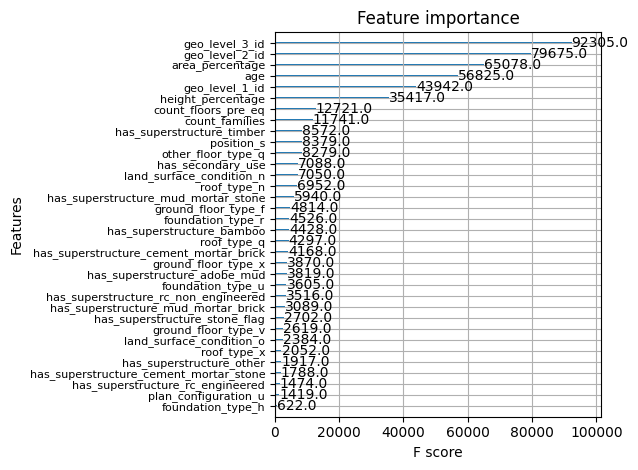

In [29]:
# # Import necessary libraries
# from xgboost import XGBClassifier, plot_importance
# import matplotlib.pyplot as plt
# import json

# # Get the hyperparameters of the model and print them
# best_params = study.best_trial.params

# # Add the static parameters
# best_params.update({
#     'objective': 'multi:softmax',
#     'num_class': 3,
#     'eval_metric': 'mlogloss',
#     'random_state': 42,
# })

# # Write the hyperparameters to a new file
# with open('hyperparameters_XGBoost_model1.json', 'w') as f:
#     json.dump(best_params, f)

# # Create the model with the best parameters
# model1 = XGBClassifier(**best_params) # the ** operator is used to unpack a dictionary and pass it's key value pairs as keyword arguments to a function

# # Fit the model to the full data
# model1.fit(train_X1_full, train_Y1_temp_full)  # Make sure to change the name to match whatever model you are using

# # Plot bar plot of the feature importances to visualize the model
# plt.figure(figsize=(80, 20), dpi=200)

# # Plot the feature importance
# ax = plot_importance(model1)

# # Decrease the font size of the y-axis labels since there are two many features
# for label in ax.get_yticklabels():
#     label.set_size(8)

# # Adjust the layout
# plt.tight_layout()

# # Save the plot
# plt.savefig('feature_importance_XGBoost_model1.png')

# # Show the plot
# plt.show()

### Submitting Model 1. Score: 0.7472!!!

In [30]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Concatenate the datasets
# full_X = pd.concat([train_X1, valid_X1, test_X1])
# full_Y_temp = pd.concat([train_Y1_temp, valid_Y1_temp, test_Y1_temp])

# # Refit the model on the full dataset
# model1.fit(full_X, full_Y_temp)

# # Save the model to a file using joblib
# from joblib import dump
# dump(model1, 'saved_XGBoost_model1.joblib') # Make sure to change the name of the file to match up with the model number!


# # # This is how to load the model from joblib
# # from joblib import load
# # model1 = load('model1.joblib')  # Make sure to change the name of the file to match up with the model number!

# # Separate building_ids and features in the test data
# competition_test_building_ids = test_data1['building_id']
# competition_test_X = test_data1.drop('building_id', axis=1)

# # Predict on the competition test data
# competition_y_pred = model1.predict(competition_test_X)

# # Since the competition expects labels in the range 1-3, add 1 to the predictions
# competition_y_pred = competition_y_pred + 1

# # Create a DataFrame for submission
# submission = pd.DataFrame({
#     'building_id': competition_test_building_ids,
#     'damage_grade': competition_y_pred
# })

# # Save the submission DataFrame to a CSV file for submission
# submission.to_csv('submission_XGBoost_1.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
# print("Successfully Submitted!")

Successfully Submitted!


### Model 2, trying out some of the other good hyperparameters from the Model 1 optuna hyperparameter tuning

In [ ]:
# [I 2024-01-10 00:04:59,965] Trial 82 finished with value: 0.7441874743381645 and parameters: {'n_estimators': 566, 'max_depth': 9, 'learning_rate': 0.06990259781853493, 'subsample': 0.8920015569105262, 'reg_alpha': 0.13284341131896668, 'reg_lambda': 1.6799006741969436e-05}. Best is trial 82 with value: 0.7441874743381645.

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

model2 = XGBClassifier(
    objective = 'multi:softmax',
    num_class = 3,
    eval_metric = 'mlogloss',
    random_state = 42,

    # Best parameters from trial 82
    n_estimators=566,
    max_depth=9,
    learning_rate=0.06990259781853493,
    subsample=0.8920015569105262,
    reg_alpha=0.13284341131896668,
    reg_lambda=1.6799006741969436e-05,
)

# Concatenate the datasets
full_X = pd.concat([train_X1, valid_X1, test_X1])
full_Y_temp = pd.concat([train_Y1_temp, valid_Y1_temp, test_Y1_temp])

# Refit the model on the full dataset
model1.fit(full_X, full_Y_temp)

# Save the model to a file using joblib
from joblib import dump
dump(model2, 'saved_XGBoost_model1.joblib') # Make sure to change the name of the file to match up with the model number!


# # This is how to load the model from joblib
# from joblib import load
# model1 = load('model1.joblib')  # Make sure to change the name of the file to match up with the model number!

# Separate building_ids and features in the test data
competition_test_building_ids = test_data1['building_id']
competition_test_X = test_data1.drop('building_id', axis=1)

# Predict on the competition test data
competition_y_pred = model1.predict(competition_test_X)

# Since the competition expects labels in the range 1-3, add 1 to the predictions
competition_y_pred = competition_y_pred + 1

# Create a DataFrame for submission
submission = pd.DataFrame({
    'building_id': competition_test_building_ids,
    'damage_grade': competition_y_pred
})

# Save the submission DataFrame to a CSV file for submission
submission.to_csv('submission_XGBoost_1.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
print("Successfully Submitted!")